In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2025-09-20 12:14:49.324987: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-20 12:14:49.328854: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-20 12:14:49.342320: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758341689.359837  278229 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758341689.364928  278229 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-20 12:14:49.383163: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
tf.__version__

'2.18.0'

# Supervise Machine Learning

is a type of machine learning where an algorithm is trained using labeled data, meaning the input data comes with corresponding correct output labels. The algorithm learns to map inputs to outputs by finding patterns in the training data. Once trained, it can predict outputs for new, unseen data accurately. This process typically involves collecting labeled data, training a model with this data, testing the model's accuracy on unseen data, and then using the model for predictions.

- Linear Regression
- Logistic Regression
- Decision Trees
- Random Forests
- Support Vector Machine (SVM)

### Linear Regression

A supervised learning algorithm used to model the relationship between a dependent variable (output) and one or more independent variables (inputs) by fitting a linear equation to observed data points. The assumption is that the relationship between the input variables and the output is linear—that is, the output changes at a constant rate as the input changes.

**How Linear Regression Works:**
- The algorithm uses training data with known inputs and outputs.
- It fits a line by minimizing the sum of squared differences between the observed outputs and predicted values (ordinary least squares method).
- The model then can predict the output for new unseen inputs based on this fitted line.

**Usage in Machine Learning:**
- Predict continuous outcomes like house prices, stock prices, or exam scores based on features.
- Understand relationships between variables (e.g., effect of study hours on scores).
- Foundation for more complex models.
- Simple, interpretable, and computationally efficient.

**Example use case:**
- Predicting a student's exam score based on hours studied.

In [3]:
height = np.array([5, 5.2, 5.5, 6.2, 6.8])
weight = np.array([52, 55, 62, 68, 72])

Text(0, 0.5, 'Weight')

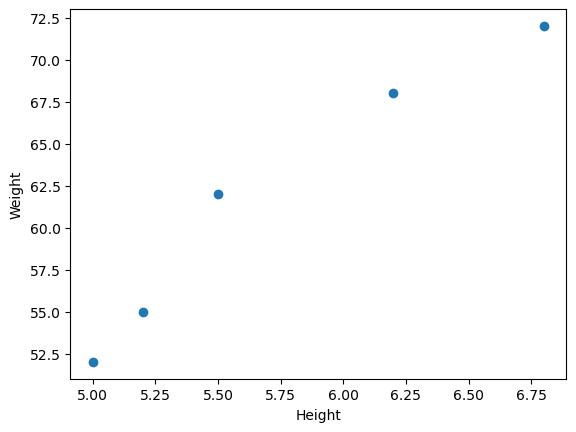

In [4]:
plt.scatter(height, weight)
plt.xlabel("Height")
plt.ylabel("Weight")

In [5]:
m, b = np.polyfit(height, weight, 1)

Text(0, 0.5, 'Weight')

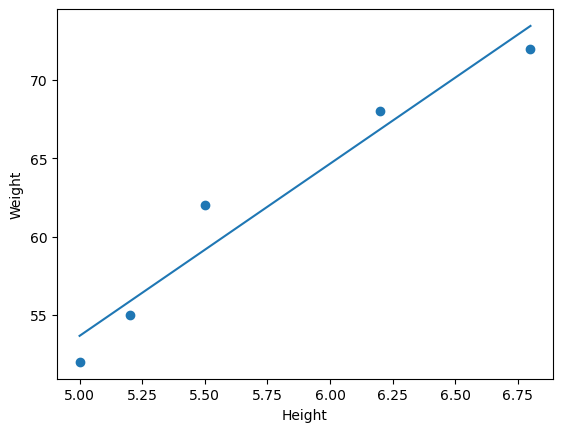

In [6]:
plt.scatter(height, weight)
plt.plot(height, m * height + b)
plt.xlabel("Height")
plt.ylabel("Weight")

In [7]:
new_height = 6.2
predicted_weight = m * new_height + b
print(f"Predicted Height: {predicted_weight}")

Predicted Height: 66.85752688172045


In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [9]:
data = pd.read_csv("data/car_purchasing_data.csv")
data.head()

,Customer Name,Customer e-mail,Country,gender,age,salary,debt,worth,amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [10]:
X = data[["gender", "age", "salary", "debt", "worth"]]
y = data["amount"]

In [11]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [12]:
to_predict_data = np.array([[0, 22, 55000, 0, 10000]])
print(f"Predicted Price: {model.predict(to_predict_data)}")

Predicted Price: [7596.91315183]


/home/xcql/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Logistic Regression

is a supervised learning algorithm used for classification problems, especially binary classification. predicts the probability of an input belonging to a particular class by modeling the relationship between independent variables and a binary dependent variable.

Logistic regression can also be extended to multinomial or ordinal logistic regression for cases with more than two classes or ordered classes.

Its simplicity, interpretability, and efficiency make logistic regression a foundational algorithm in classification tasks in machine learning.

**How it works:**
- Logistic regression uses the logistic (sigmoid) function to convert the linear combination of input features into a probability value between 0 and 1.
- The output probability represents the likelihood of the input belonging to the positive class (e.g., 1).
- A threshold (commonly 0.5) is applied to decide the predicted class — above the threshold means one class (1), below means the other class (0).

**Usage:**
- Predicting whether an email is spam or not.
- Diagnosing whether a patient has a disease (yes/no).
- Customer churn prediction (whether a customer will leave).
- Fraud detection in transactions.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv("data/heartdiseases_lite.csv")
data.head()

,Age,Gender,Education,Income,Smoker,Cholesterol,Heart_Disease
0,42,Female,Bachelor's Degree,65000,No,180,No
1,55,Male,High School Diploma,40000,Yes,245,Yes
2,30,Female,Master's Degree,80000,Yes,210,No
3,39,Male,Some College,50000,Yes,195,No
4,27,Male,Some College,30000,No,170,No


In [15]:
data = pd.get_dummies(data, columns=["Gender", "Education", "Smoker"], drop_first = True)
data.head()

,Age,Income,Cholesterol,Heart_Disease,Gender_Male,Education_Doctorate Degree,Education_High School Diploma,Education_Master's Degree,Education_Some College,Smoker_Yes
0,42,65000,180,No,False,False,False,False,False,False
1,55,40000,245,Yes,True,False,True,False,False,True
2,30,80000,210,No,False,False,False,True,False,True
3,39,50000,195,No,True,False,False,False,True,True
4,27,30000,170,No,True,False,False,False,True,False


In [16]:
X = data.drop("Heart_Disease", axis=1)
y = data["Heart_Disease"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/xcql/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_preds = model.predict(X_test)
y_preds

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'No'], dtype=object)

In [20]:
accuracy_score(y_test, y_preds)

1.0

In [21]:
y_preds_proba = model.predict_proba(X_test)[:,1]
y_preds_proba

array([0.21494141, 0.06872062, 0.8327796 , 0.63329934, 0.57825411,
       0.23845979, 0.23845979, 0.75334069, 0.13811938, 0.15857231,
       0.65598708, 0.13599046, 0.59781995, 0.08029478, 0.40263061])

In [22]:
y_test = y_test.map({"Yes": 1, "No": 0})

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_preds_proba)
auc = roc_auc_score(y_test, y_preds_proba)

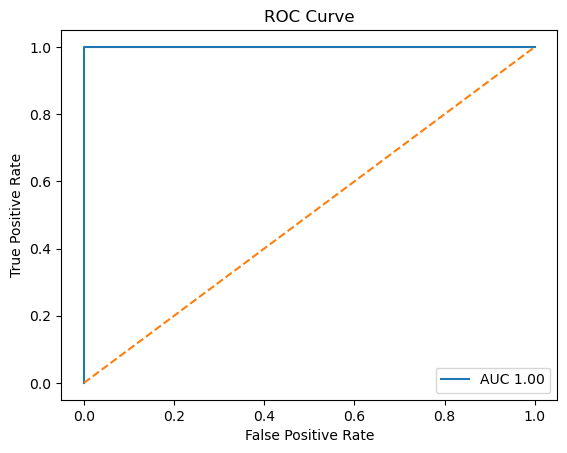

In [24]:
plt.plot(fpr, tpr, label=f"AUC {auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc = "lower right")

In [25]:
odds_ratios = np.exp(model.coef_)
odds_ratios

array([[1.28549212, 0.99996637, 0.96345121, 1.14317043, 1.58385926,
        1.96057811, 1.58581283, 0.46398878, 1.04525922]])

### Decision Tree

is a supervised machine learning algorithm that is used for both classification and regression tasks. It works by recursively splitting the dataset into subsets based on the most significant feature, making predictions by following a path of decisions (nodes) that lead to a leaf node. The tree-like structure of a Decision Tree resembles a flowchart, where each internal node represents a feature or decision rule, and each leaf node represents an outcome (prediction).

**Key Concepts:**
- **Root Node:** The topmost node, representing the entire dataset.
- **Decision Nodes:** Nodes where the dataset is split based on a feature's value.
- **Leaf Nodes:** Nodes that represent the final prediction (class or value).
- **Splitting:** The process of dividing the dataset into two or more subsets based on a feature.
- **Pruning:** Reducing the size of the tree by removing parts of the tree that don't provide significant improvements in prediction.

**How does it work?**
- The algorithm picks a feature and splits the data at a threshold value to maximize the homogeneity of the resulting subsets.
- The decision to split is usually made using a criterion like Gini Impurity or Entropy (for classification), and Mean Squared Error (for regression).
- The process continues recursively until the tree reaches a stopping condition (like a maximum depth or minimum samples in a leaf).

**Usage:**
- **Classification:** Predicting categories (e.g., spam vs. not spam, disease diagnosis).
- **Regression:** Predicting continuous values (e.g., house prices, temperature).
- Common applications include medical diagnosis, credit risk assessment, customer churn prediction, and more.

In [38]:
from sklearn.datasets import load_iris # Load the Iris dataset
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import os
import graphviz

In [42]:
# load the iris dataset

data = load_iris()
X = data.data
y = data.target

Accuracy: 0.9473684210526315


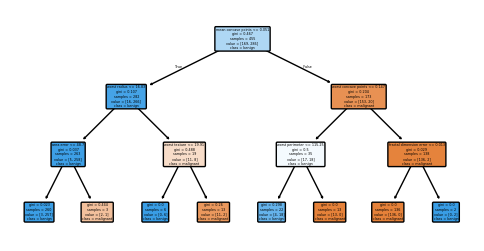

In [48]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# create a decision tree classifier
model = DecisionTreeClassifier(max_depth=3)

# train the model
model.fit(X_train, y_train)

# make a prediction
y_preds = model.predict(X_test)

# calculate the accuracy
accuracy = accuracy_score(y_test, y_preds)
print(f"Accuracy: {accuracy}")

# visualize the decision tree
plt.figure(figsize=(6, 3))
tree.plot_tree(model, filled = True, feature_names = data.feature_names, class_names = data.target_names, rounded = True)
plt.show()

### Random Forest

is an ensemble learning algorithm that combines the predictions of `multiple Decision Trees to improve the overall performance and reduce the risk of overfitting`. It is used for both classification and regression tasks. Instead of relying on a single decision tree, a Random Forest builds multiple decision trees and averages their predictions (for regression) or uses a majority vote (for classification) to make the final prediction.

**Key Concepts:**

- **Ensemble Learning:** Combining multiple models (in this case, decision trees) to produce a stronger overall model.
- **Bagging:** Random Forest uses a technique called bootstrap aggregating or bagging where multiple subsets of the training data are sampled with replacement to train each tree. This helps to reduce variance and improve generalization.
- **Random Feature Selection:** At each split in the tree, a random subset of features is considered, which reduces the correlation between the individual trees and increases diversity in the forest.

**How does work?**
- **Multiple Decision Trees:** Random Forest builds many decision trees, each trained on a random subset of the data.
- **Bootstrapping:** Each tree is trained on a random subset (with replacement) of the training data.
- **Random Feature Selection:** When splitting nodes, only a random subset of features is considered for each split (not all features).
- **Majority Voting (Classification):** For classification, the class that most trees predict is chosen as the final prediction.
- **Averaging (Regression):** For regression, the final prediction is the average of the predictions from all trees.

**Usage:**
- **Classification:** Spam detection, disease diagnosis, customer segmentation, fraud detection.
- **Regression:** Predicting house prices, stock prices, or energy consumption.
- Common in fields like finance, healthcare, and marketing for robust predictions.

In [44]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import load_breast_cancer

Accuracy: 0.9649122807017544


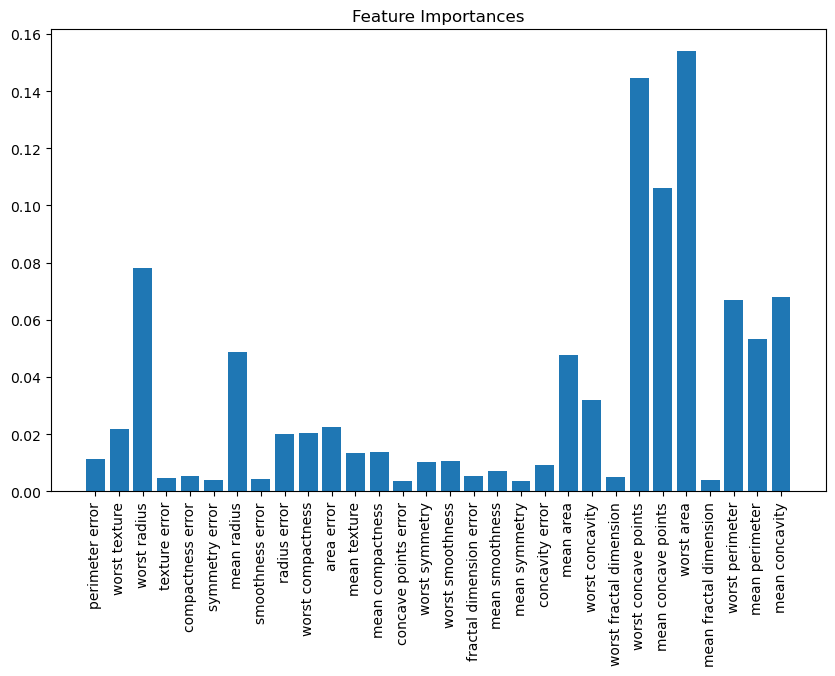

In [52]:
# load the data
data = load_breast_cancer()
X = data.data
y = data.target

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = RandomForestClassifier(n_estimators = 100, random_state = 42)

# train the model
model.fit(X_train, y_train)

# make a prediction
y_preds = model.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_preds)
print(f"Accuracy: {accuracy}")

# get feature importance
importances = model.feature_importances_

# sort feature importances indescneding order & rearrange features names do they match the sorted feature importances
indices = np.argsort(importances[::-1])
feature_names = data.feature_names[indices]

# create bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names, rotation = 90)
plt.show()

In [54]:
# Display feature importance
feature_importance = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': model.feature_importances_
})
print("\nFeature Importance:\n")
print(feature_importance.sort_values(by='Importance', ascending=False))


Feature Importance:

                    Feature  Importance
23               worst area    0.153892
27     worst concave points    0.144663
7       mean concave points    0.106210
20             worst radius    0.077987
6            mean concavity    0.068001
22          worst perimeter    0.067115
2            mean perimeter    0.053270
0               mean radius    0.048703
3                 mean area    0.047555
26          worst concavity    0.031802
13               area error    0.022407
21            worst texture    0.021749
25        worst compactness    0.020266
10             radius error    0.020139
5          mean compactness    0.013944
1              mean texture    0.013591
12          perimeter error    0.011303
24         worst smoothness    0.010644
28           worst symmetry    0.010120
16          concavity error    0.009386
4           mean smoothness    0.007285
19  fractal dimension error    0.005321
15        compactness error    0.005253
29  worst fractal 

### Support Vector Machine (SVM)

is a supervised machine learning algorithm used for classification and regression tasks. It is particularly known for its robustness in `high-dimensional spaces and its ability to handle both linear and non-linear decision boundaries`. The key idea behind SVM is to find a `hyperplane` that best separates different classes in the feature space.

**Key Concepts:**
- **Hyperplane:** A hyperplane is a decision boundary that separates data points belonging to different classes. In 2D, it is a line; in 3D, it is a plane; and in higher dimensions, it becomes a hyperplane.
- **Support Vectors:** These are the data points that are closest to the hyperplane. These points define the margin and are crucial in determining the optimal hyperplane.
- **Margin:** The margin is the distance between the hyperplane and the closest data point from either class (support vectors). SVM aims to maximize this margin, as a larger margin typically leads to better generalization.
- **Kernel Trick:** When the data is not linearly separable, SVM uses a technique called the kernel trick to map the data to a higher-dimensional space where a linear hyperplane can be used to separate the classes. Common kernels include:
    - **Linear kernel:** For linearly separable data.
    - **Polynomial kernel:** For non-linear data with polynomial relationships.
    - **RBF (Radial Basis Function) kernel:** For data that is not linearly separable in higher dimensions.
- **C Parameter:** This parameter controls the trade-off between maximizing the margin and minimizing classification error. A large value of C means the model will try to classify all points correctly (low bias, high variance), while a smaller value of C will allow some misclassification for the sake of a wider margin (high bias, low variance).

**How does it Works:**
- **Training:** SVM tries to find the optimal hyperplane that maximizes the margin between the two classes. It focuses on the support vectors to define this hyperplane.
- **Classification:** Once the hyperplane is determined, new data points are classified based on which side of the hyperplane they fall on.

**Usage:**
- **Classification:** Text classification (e.g., spam detection), image classification, bioinformatics (e.g., protein classification), and sentiment analysis.
- **Regression:** Support Vector Regression (SVR) for predicting continuous values like stock prices or temperature.
Common in applications requiring high accuracy on small to medium-sized datasets, such as medical diagnosis or fault detection.

In [56]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [62]:
# load the data
data = load_breast_cancer()
X = data.data
y = iris.target

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scalled = scaler.fit_transform(X_test)

# initialize the model
model = SVC(kernel="linear", C=1.0, random_state=42)

# train the model
model.fit(X_train_scaled, y_train)

# make a prediction
y_preds = model.predict(X_test_scalled)

# calculate accuracy
accuracy = accuracy_score(y_test, y_preds)
print(f"Accuracy: {accuracy}")

ValueError: Found input variables with inconsistent numbers of samples: [569, 150]